In [1]:
import numpy as np  
seed = 7
np.random.seed(seed)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas
import pandas as pd

NUM_FEATURES = 20

# features_updated_version_610
# features_updated_version_729_kas

dataframe = pandas.read_csv("features_updated_london.csv", header=None)
dataset = dataframe.values 

X = dataset[:, 0:NUM_FEATURES]
y = dataset[:, NUM_FEATURES]

print y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

#print the distribution of classes on train/test
print pd.value_counts(pd.Series(y_test), normalize=True)
print pd.value_counts(pd.Series(y_train), normalize=True)

[ 1.  1.  1. ...,  1.  0.  1.]
1.0    0.959831
0.0    0.040169
dtype: float64
1.0    0.960183
0.0    0.039817
dtype: float64


In [9]:
from sklearn.linear_model import LogisticRegression

# logistic regression
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_LR = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_LR[:, 1]))

print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

#logistic regression coefficients 
print pd.DataFrame(np.transpose(clf.coef_)) 

0.574348132488
0.484491331118
[[ 25  32]
 [572 790]]
             precision    recall  f1-score   support

        0.0       0.04      0.44      0.08        57
        1.0       0.96      0.58      0.72      1362

avg / total       0.92      0.57      0.70      1419

           0
0  -0.033596
1  -0.306215
2   0.037507
3   0.059733
4   0.139496
5   0.119017
6   0.513718
7  -0.250686
8  -0.071347
9  -0.254755
10 -0.434382
11  0.366794
12  0.000000
13  0.000000
14  0.185726
15  0.000000
16  0.000000
17 -0.038538
18 -0.019041
19  0.034589


In [10]:
from sklearn import ensemble

# gradient boosting 
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_GB = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))

print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted)) 

0.957716701903
0.586263750419
[[   0   57]
 [   3 1359]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        57
        1.0       0.96      1.00      0.98      1362

avg / total       0.92      0.96      0.94      1419



In [11]:
from sklearn.dummy import DummyClassifier

# random baseline
clf = DummyClassifier(strategy='uniform')
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_random = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_random[:, 1]))

print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted)) 

0.482029598309
0.5
[[ 27  30]
 [705 657]]
             precision    recall  f1-score   support

        0.0       0.04      0.47      0.07        57
        1.0       0.96      0.48      0.64      1362

avg / total       0.92      0.48      0.62      1419



In [12]:
# svc
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_SVC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))

print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted)) 

0.959830866808
0.586263750419
[[   0   57]
 [   0 1362]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        57
        1.0       0.96      1.00      0.98      1362

avg / total       0.92      0.96      0.94      1419



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
# random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_RFC = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_GB[:, 1]))

print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted)) 

0.958421423538
0.586263750419
[[   1   56]
 [   3 1359]]
             precision    recall  f1-score   support

        0.0       0.25      0.02      0.03        57
        1.0       0.96      1.00      0.98      1362

avg / total       0.93      0.96      0.94      1419



In [14]:
# neural net 
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
probs_NN = clf.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs_NN[:, 1]))

print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

0.957011980268
0.464744828297
[[   0   57]
 [   4 1358]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        57
        1.0       0.96      1.00      0.98      1362

avg / total       0.92      0.96      0.94      1419



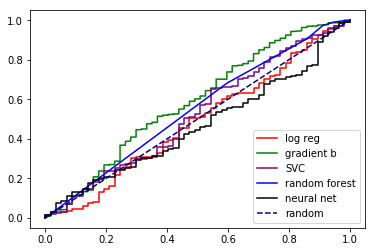

In [15]:
from matplotlib import pyplot as plt

# plot area under curve in order to compare multiple classifiers
fpr, tpr, _ = metrics.roc_curve(y_test, probs_LR[:, 1]) #classifier 1
fpr2, tpr2, _ = metrics.roc_curve(y_test, probs_GB[:, 1]) #classifier 2
fpr3, tpr3, _ = metrics.roc_curve(y_test, probs_SVC[:, 1]) #classifier 3
fpr4, tpr4, _ = metrics.roc_curve(y_test, probs_RFC[:, 1]) #classifier 3
fpr5, tpr5, _ = metrics.roc_curve(y_test, probs_NN[:, 1]) #classifier 3

plt.plot(fpr,tpr, color='red', label='log reg') 
plt.plot(fpr2,tpr2, color='green', label='gradient b')
plt.plot(fpr3,tpr3, color='purple', label='SVC')
plt.plot(fpr4,tpr4, color='blue', label='random forest')
plt.plot(fpr5,tpr5, color='black', label='neural net')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
plt.legend(loc="lower right") 
plt.show()